# AIRDOS Data Parser

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import matplotlib.pyplot as plt
import scipy

In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [42]:
fto = './data/DATALOG.TXT' #  File to Open
l=[]
l.extend(range(0,520))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*')

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''


# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

fto = './data/payload_habhub.csv' #  File to Open
df2 = pd.read_table(fto, sep=',', header=0)
df2.reset_index(drop=True, inplace=True)
df2.time = '1900-1-1 ' + df2.time
df2.time = pd.to_datetime(df2.time)#.dt.time
df2.set_index('time', inplace=True)

## Correct DC offset

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


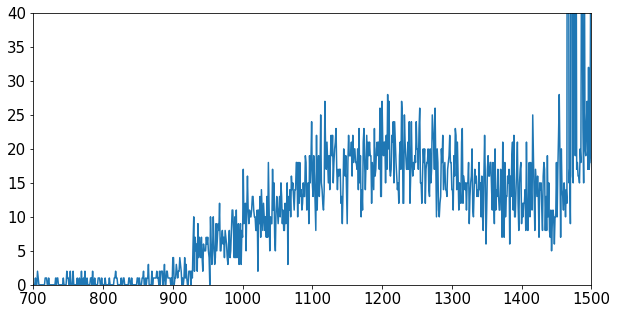

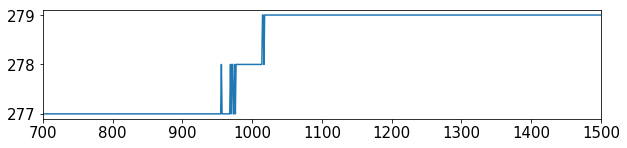

In [110]:
xx = df.loc[700:,:]
xx['max'] = xx.loc[:,250:290].idxmax(axis=1)
yy = df.loc[700:,:]
yy['max'] = yy.loc[:,250:290].idxmax(axis=1)

NOISE = 285

xx.loc[xx['max']==277,'flux'] = xx.loc[xx['max']==277].iloc[:,NOISE:514].sum(axis=1)
xx.loc[xx['max']==278,'flux'] = xx.loc[xx['max']==278].iloc[:,NOISE+1:514].sum(axis=1)
xx.loc[xx['max']==279,'flux'] = xx.loc[xx['max']==279].iloc[:,NOISE+2:514].sum(axis=1)

yy.loc[yy['max']==277,range(NOISE,514)] = yy.loc[yy['max']==277,range(NOISE,514)].mul(range(NOISE,514),axis=1)
yy.loc[yy['max']==278,range(NOISE,514)] = yy.loc[yy['max']==278,range(NOISE,514)].mul(range(NOISE-1,514-1),axis=1)
yy.loc[yy['max']==279,range(NOISE,514)] = yy.loc[yy['max']==279,range(NOISE,514)].mul(range(NOISE-2,514-2),axis=1)
yy.loc[yy['max']==277,'dose'] = yy.loc[yy['max']==277].iloc[:,NOISE:514].sum(axis=1)
yy.loc[yy['max']==278,'dose'] = yy.loc[yy['max']==278].iloc[:,NOISE+1:514].sum(axis=1)
yy.loc[yy['max']==279,'dose'] = yy.loc[yy['max']==279].iloc[:,NOISE+2:514].sum(axis=1)

#xx['flux']
plt.figure(figsize=(10,5))
plt.ylim([0,40])
xx['flux'].plot()

plt.figure(figsize=(10,2))
xx['max'].plot()


## Add Time to Dosimeter

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


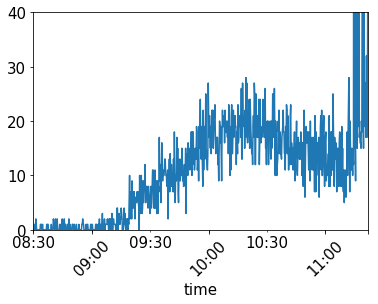

In [127]:
xx['time'] = pd.date_range( end='1900-1-1 11:22:00', periods=xx[0].count(),freq='12905L')#.time
#xx.reset_index(drop=True, inplace=True)
xx.set_index('time', inplace=True)
plt.ylim([0,40])
xx['flux'].plot()
plt.xticks(rotation=45)

yy['time'] = pd.date_range( end='1900-1-1 11:22:00', periods=yy[0].count(),freq='12905L')#.time
#xx.reset_index(drop=True, inplace=True)
yy.set_index('time', inplace=True)


## Plot Altitude

(array([ 693596.31458333,  693596.33541667,  693596.35625   ,
         693596.37708333,  693596.39791667,  693596.41875   ,
         693596.43958333,  693596.46041667,  693596.48125   ]),
 <a list of 9 Text xticklabel objects>)

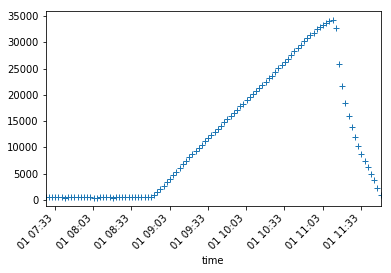

In [6]:
df2.altitude.plot(linestyle='None', marker='+')
plt.xticks(rotation=45)


## Plot both

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


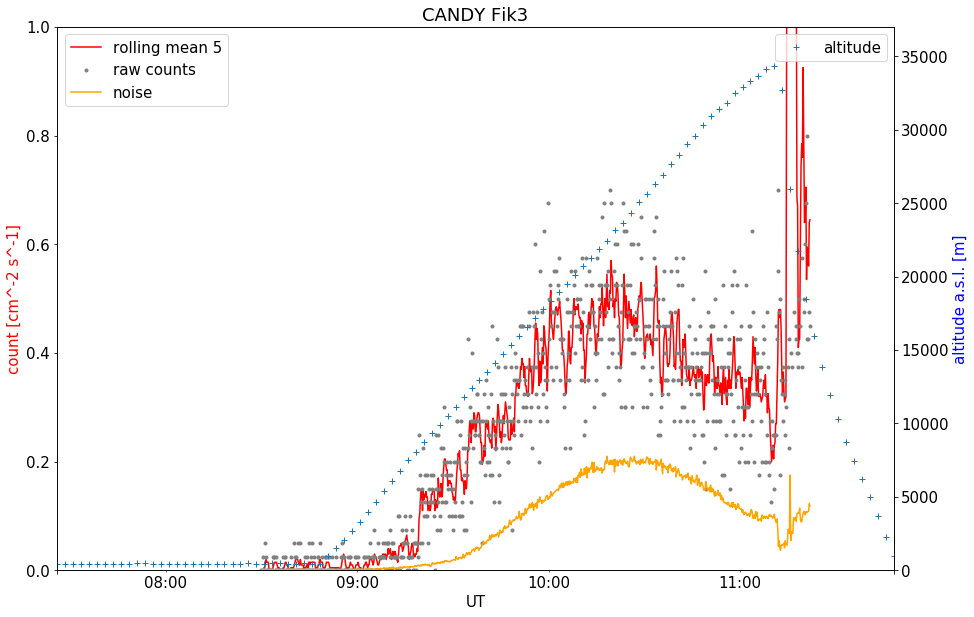

In [144]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 15})

WINDOW = 5
xx['rad'] = xx['flux'].rolling(WINDOW).mean()

plt.ylim([0,1])
(xx['rad']/40).plot(c='r', label='rolling mean ' + str(WINDOW)) # /40 because of 4 cm^2 and 10 s
(xx['flux']/40).plot(c='gray', linestyle='None', marker='.', label='raw counts')
(xx[282]/10000).plot(c='orange', linestyle='-', label='noise')
plt.ylabel('count [cm^-2 s^-1]', color='r')
plt.xlabel('UT')
plt.legend(loc=2)

ax = plt.twinx()

df2.altitude.plot(linestyle='None', marker='+', label='altitude')
plt.ylim([0,37000])

plt.title('CANDY Fik3')
plt.ylabel('altitude a.s.l. [m]', color='b')
plt.legend(loc=1)

## Join Flux & Altitude

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


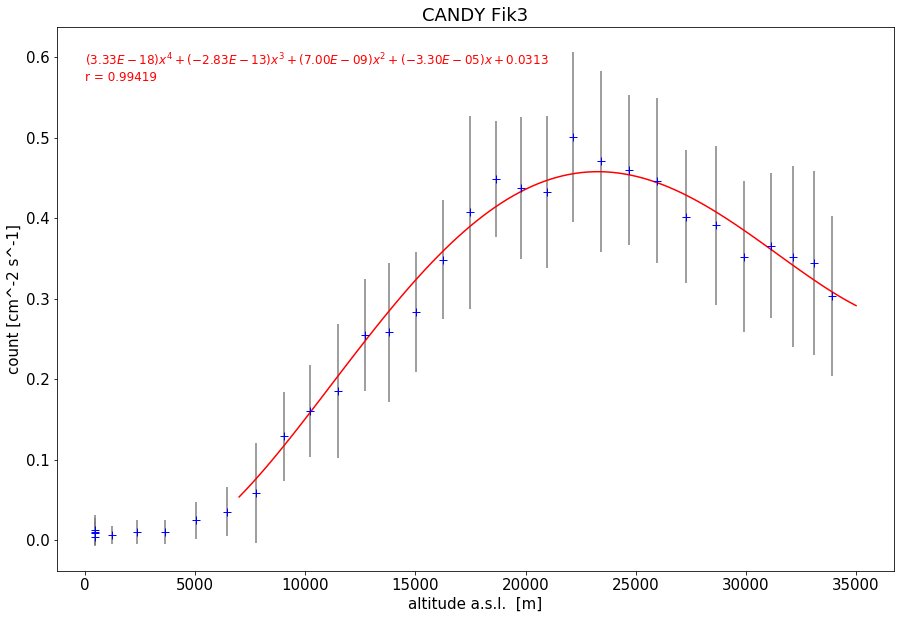

In [123]:
from scipy.stats.stats import pearsonr

plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 15})

PERIOD = '300s'

xx['flux1'] = xx['flux']/40
xx['std'] = xx['flux1']
mmm = xx['flux1'].resample(PERIOD).mean()
sss = xx['std'].resample(PERIOD).std()
#aaa = df2['altitude'].resample(PERIOD).pad()
aaa = df2['altitude'].resample(PERIOD).mean()
zz = pd.concat([mmm, aaa, sss], axis=1)
#zz['roundalt'] = zz.altitude/1000.
#zz['roundalt'] = zz.roundalt.round(0)*1000

zz.dropna(inplace=True)
zz = zz.loc['1900-1-1 8:0:0':'1900-1-1 11:05:0']

zz.reset_index(drop=True, inplace=True)
#zz.set_index(['altitude'], inplace=True)

plt.errorbar(zz['altitude'],zz['flux1'], yerr=zz['std'], fmt='+', ms=8, ecolor='grey',ls='none', mec='blue', capsize=0)
#plt.plot(zz.altitude,zz.flux1, linestyle='None', marker='.')
plt.title('CANDY Fik3')
plt.xlabel('altitude a.s.l.  [m]')
plt.ylabel('count [cm^-2 s^-1]')

coef = np.polyfit(zz.altitude,zz.flux1, 4)
p = np.poly1d(coef)

t = np.linspace(7000, 35000, 100)
plt.plot(t, p(t), '-', label=p, color='r')

#plt.legend(loc=1)
r = pearsonr(p(zz['altitude']),zz['flux1'])
plt.text(0,0.57,'r = ' + str(round(r[0],5)), fontsize=12, color='r')
plt.text(0,0.59, r'$(' + '{0:1.2E}'.format(coef[0]) +') x^4 + (' + '{0:1.2E}'.format(coef[1]) +') x^3 + ('  + '{0:1.2E}'.format(coef[2]) +') x^2 + ('  + '{0:1.2E}'.format(coef[3]) +') x + ' + str(round(coef[4], 4)) + '$', fontsize=12, color='r')


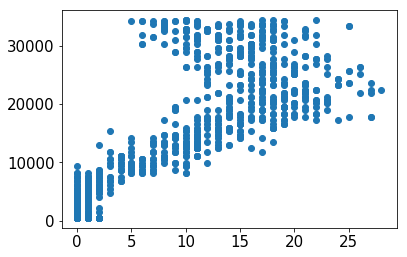

In [190]:
df3 = pd.DataFrame(columns=['alt','hits','n','avg','min','max','std'])
df3['alt'] = pd.Series(range(1000,35000,1000))
df3['hits'] = 0
df3['n'] = 0
df3['min'] = 1000
df3['max'] = 0

xxx = xx['flux'].resample('10s').pad()
xxxx = df2['altitude'].resample('10s').pad()
zz = pd.concat([xxx, xxxx], axis=1)
zz['roundalt'] = zz.altitude/1000.
zz['roundalt'] = zz.roundalt.round(0)*1000

zz.dropna(inplace=True)
zz = zz.loc['1900-1-1 8:0:0':'1900-1-1 11:12:0']

#zz['flux'].plot()
#ax = plt.twinx()
#zz['altitude'].plot()

#for index, row in zz.iterrows():
#    df3.loc[(df3.alt == row.roundalt) & (df3.min > row['flux']), 'min'] = row['flux']
#    df3.loc[(df3.alt == row.roundalt) & (df3.max < row['flux']), 'max'] = row['flux']
#    df3.loc[df3.alt == row.roundalt,'hits'] += row['flux']
#    df3.loc[df3.alt == row.roundalt,'n'] += 1
#for a in range(1000,35000,1000):
#    df3.loc[df3.alt == a, 'std'] = np.std(zz.loc[a == zz.roundalt,'flux'])
#df3.avg = df3.hits / df3.n
#plt.plot(df3.avg,df3.alt, linestyle='None', marker='o')
#plt.errorbar(df3.alt,df3.avg, yerr=df3.std, fmt='o')
plt.plot(zz.flux,zz.altitude, linestyle='None', marker='o')

## Plot Map

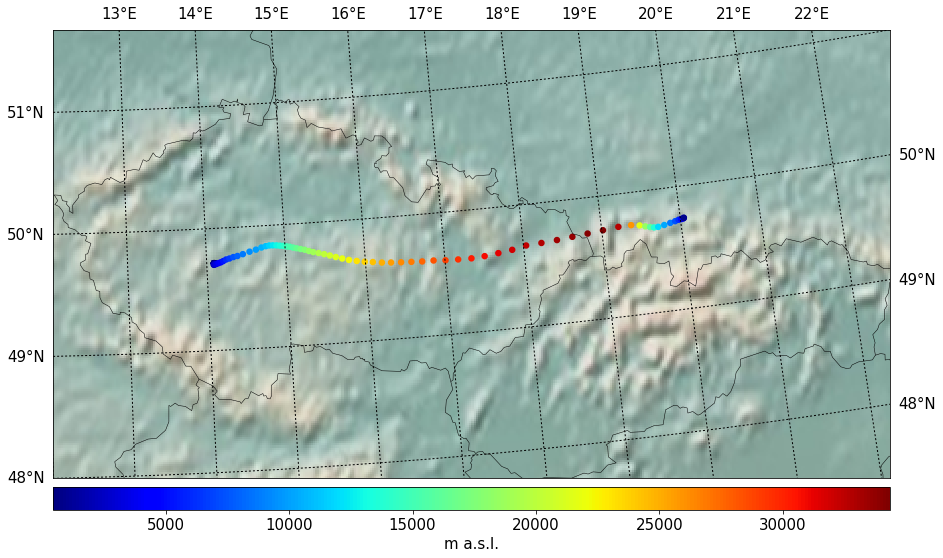

In [154]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os

plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 15})


# draw map with markers for float locations
#m = Basemap(projection='kav7',lon_0=0)
# create Basemap instance.
#m = Basemap(llcrnrlon=-0,llcrnrlat=0,urcrnrlon=60,urcrnrlat=60,projection='mill')
m = Basemap(llcrnrlon=12,llcrnrlat=48,urcrnrlon=23,urcrnrlat=51, epsg = 31284,resolution='i',projection='merc')
#m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1100)#, verbose= True)
m.drawcountries()
#m.drawrivers(color='#0000ff')
m.shadedrelief(scale=2)
#m.etopo(scale=4)

x, y = m(df2.longitude.tolist(),df2.latitude.tolist())

m.drawparallels(np.arange(48.,52.,1.),labels=[1,1,0,0])
m.drawmeridians(np.arange(12.,23.,1.),labels=[0,0,1,0])

im1 = m.scatter(x,y,c=df2.altitude.tolist(),s=20,marker='o',  linewidth='2', cmap='jet')
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('m a.s.l.')
plt.show()

Save dataframe to a file.

In [40]:
xx.to_csv('xx.csv')
zz.to_csv('zz.csv')
yy = zz.drop('std', 1)
yy.reset_index(drop=True, inplace=True)
yy.set_index('altitude', inplace=True)

yy.to_csv('yy.csv')
yy

,flux1
altitude,
438.0,0.010714
448.0,0.004545
457.0,0.006250
474.0,0.006818
455.0,0.011364
451.0,0.009091
489.0,0.011364
473.0,0.011364
455.0,0.013636


(0, 30)

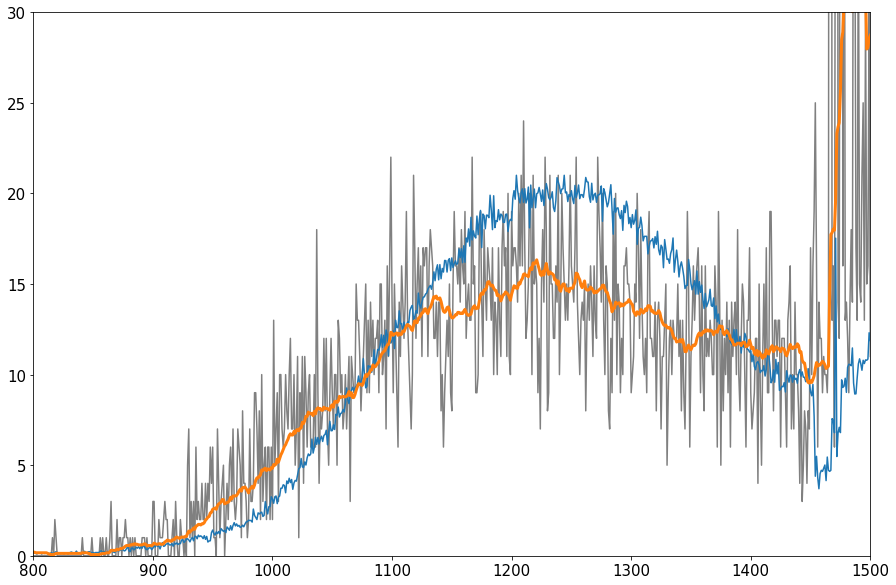

In [140]:
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(256,516)].sum(axis=1)
#rc['sum']

plt.figure(figsize=(15,10))

rc['sum'] = rc[range(288,513)].sum(axis=1)
rc.ix[800:,'sum'].plot(c='gray')
rc['ble'] = rc.ix[0:,282]/100
rc['xxx'] = rc['sum']#- rc['ble']
rc.ix[800:,'ble'].plot()
#rc.ix[800:,'xxx'].plot()
WINDOW = 30
rc['radavg'] = rc['xxx'].rolling(WINDOW).mean()
rc.ix[800:,'radavg'].plot(lw=3)

plt.ylim([0,30])
plt.title('CANDY Fik3')
plt.xlabel('altitude a.s.l.  [m]')
plt.ylabel('count [cm^-2 s^-1]')

In [44]:
df.loc[800:,270:].to_csv('qq.csv')

## Plot Energy

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


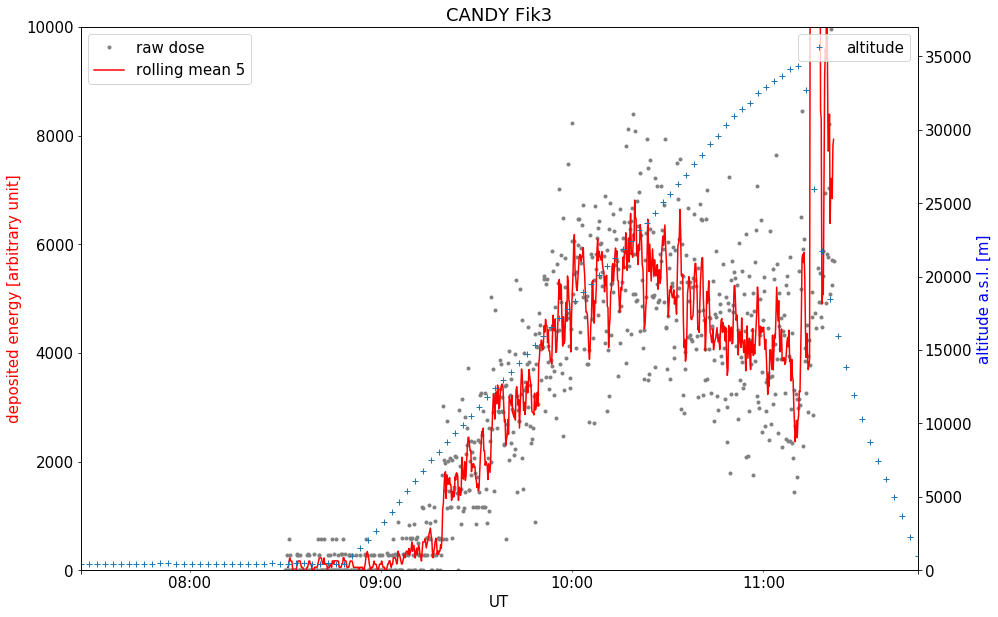

In [128]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 15})

WINDOW = 5
yy['dose_mean'] = yy['dose'].rolling(WINDOW).mean()

yy.dose.plot(c='gray', linestyle='None', marker='.', label='raw dose') 
yy.dose_mean.plot(c='r', label='rolling mean ' + str(WINDOW)) 
plt.ylim([0,10000])
#(xx['rad']/40).plot(c='r', label='rolling mean ' + str(WINDOW)) # /40 because of 4 cm^2 and 10 s
#(xx['flux']/40).plot(c='gray', linestyle='None', marker='.', label='raw counts')
plt.ylabel('deposited energy [arbitrary unit]', color='r')
plt.xlabel('UT')
plt.legend(loc=2)

ax = plt.twinx()

df2.altitude.plot(linestyle='None', marker='+', label='altitude')
plt.ylim([0,37000])

plt.title('CANDY Fik3')
plt.ylabel('altitude a.s.l. [m]', color='b')
plt.legend(loc=1)


## Join Dose and Altitude

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


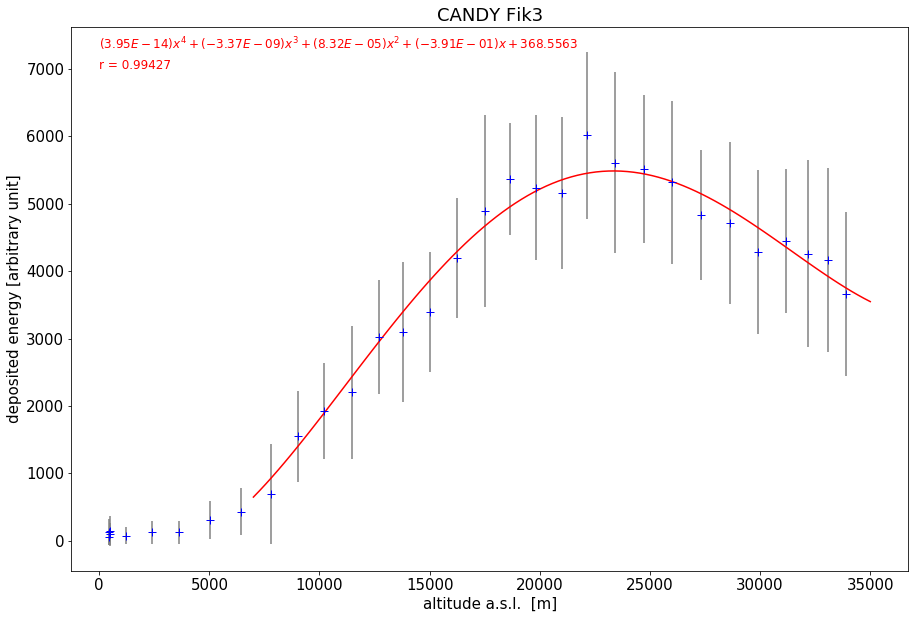

In [137]:
from scipy.stats.stats import pearsonr

plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 15})

PERIOD = '300s'

yy['std'] = yy['dose']
mmm = yy['dose'].resample(PERIOD).mean()
sss = yy['std'].resample(PERIOD).std()
#aaa = df2['altitude'].resample(PERIOD).pad()
aaa = df2['altitude'].resample(PERIOD).mean()
zz = pd.concat([mmm, aaa, sss], axis=1)
#zz['roundalt'] = zz.altitude/1000.
#zz['roundalt'] = zz.roundalt.round(0)*1000

zz.dropna(inplace=True)
zz = zz.loc['1900-1-1 8:0:0':'1900-1-1 11:05:0']

zz.reset_index(drop=True, inplace=True)
#zz.set_index(['altitude'], inplace=True)

plt.errorbar(zz['altitude'],zz['dose'], yerr=zz['std'], fmt='+', ms=8, ecolor='grey',ls='none', mec='blue', capsize=0)
#plt.plot(zz.altitude,zz.flux1, linestyle='None', marker='.')
plt.title('CANDY Fik3')
plt.xlabel('altitude a.s.l.  [m]')
plt.ylabel('deposited energy [arbitrary unit]')

coef = np.polyfit(zz.altitude,zz.dose, 4)
p = np.poly1d(coef)

t = np.linspace(7000, 35000, 100)
plt.plot(t, p(t), '-', label=p, color='r')

#plt.legend(loc=1)
r = pearsonr(p(zz['altitude']),zz['dose'])
plt.text(0,7000,'r = ' + str(round(r[0],5)), fontsize=12, color='r')
plt.text(0,7300, r'$(' + '{0:1.2E}'.format(coef[0]) +') x^4 + (' + '{0:1.2E}'.format(coef[1]) +') x^3 + ('  + '{0:1.2E}'.format(coef[2]) +') x^2 + ('  + '{0:1.2E}'.format(coef[3]) +') x + ' + str(round(coef[4], 4)) + '$', fontsize=12, color='r')


In [95]:
dff = pd.DataFrame([[1,2],[3,4],[5,6]])
dff.mul(range(2,4), axis=1)
yy.loc[yy['max']==277,range(NOISE,514)] = yy.loc[yy['max']==277,range(NOISE,514)].mul(range(NOISE,514),axis=1)

(0, 10000)

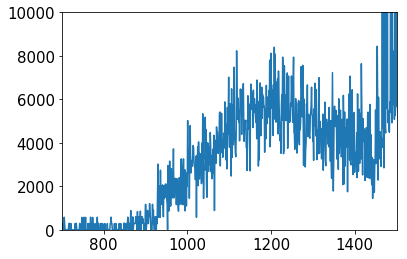

In [112]:
yy.dose.plot()
plt.ylim([0,10000])

In [109]:
yy.iloc[100:,:]

,0,1,2,3,4,5,6,7,8,9,...,512,513,514,515,516,517,518,519,max,dose
800,$CANDY,152,0,0,0,0,0,0,0,0,...,0.0,0.0,855,855,0,25101,39579,65535,277,0.0
801,$CANDY,153,0,0,0,0,0,0,0,0,...,0.0,0.0,853,853,0,25171,39511,65535,277,0.0
802,$CANDY,154,0,0,0,0,0,0,0,0,...,0.0,0.0,801,801,0,25271,39463,65535,277,0.0
803,$CANDY,155,0,0,0,0,0,0,0,0,...,0.0,0.0,827,827,0,25276,39432,65535,277,286.0
804,$CANDY,156,0,0,0,0,0,0,0,0,...,0.0,0.0,818,818,0,25308,39409,65535,277,0.0
805,$CANDY,157,0,0,0,0,0,0,0,0,...,0.0,0.0,838,838,0,25256,39441,65535,277,0.0
806,$CANDY,158,0,0,0,0,0,0,0,0,...,0.0,0.0,867,867,0,25155,39513,65535,277,0.0
807,$CANDY,159,0,0,0,0,0,0,0,0,...,0.0,0.0,824,824,0,25285,39426,65535,277,0.0
808,$CANDY,160,0,0,0,0,0,0,0,0,...,0.0,0.0,828,828,0,25175,39532,65535,277,0.0
809,$CANDY,161,0,0,0,0,0,0,0,0,...,0.0,0.0,855,855,0,25190,39490,65535,277,286.0
